# Dataset exploration




In [1]:
import os
import jsonlines
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
path = os.path.join('datasets', 'jsonl')
train_path = os.path.join(path, 'dataset_train.jsonl')
dev_path = os.path.join(path, 'dataset_dev.jsonl')
val_path = os.path.join(path, 'dataset_val.jsonl')
datasets_paths = [train_path, dev_path, val_path]

```json
{
    "text":" * ABARO, Bourg ou petite Ville de Syrie dans l'Antiliban. ",
    "meta":{
        "volume":1,
        "numero":95,
        "head":"ABARO",
        "paragraph":1,
        "domain_article":"Géographie",
        "domain_paragraph":"Géographie",
        "author":"Diderot"
        },
    "_input_hash":1401495229,
    "_task_hash":1065605843,
    "tokens":[
        {"text":" ","start":0,"end":1,"id":0,"ws":false},
        {"text":"*","start":1,"end":2,"id":1,"ws":true},
        {"text":"ABARO","start":3,"end":8,"id":2,"ws":false},
        {"text":",","start":8,"end":9,"id":3,"ws":true},
        {"text":"Bourg","start":10,"end":15,"id":4,"ws":true},
        {"text":"ou","start":16,"end":18,"id":5,"ws":true},
        {"text":"petite","start":19,"end":25,"id":6,"ws":true},
        {"text":"Ville","start":26,"end":31,"id":7,"ws":true},
        {"text":"de","start":32,"end":34,"id":8,"ws":true},
        {"text":"Syrie","start":35,"end":40,"id":9,"ws":true},
        {"text":"dans","start":41,"end":45,"id":10,"ws":true},
        {"text":"l'","start":46,"end":48,"id":11,"ws":false},
        {"text":"Antiliban","start":48,"end":57,"id":12,"ws":false},
        {"text":".","start":57,"end":58,"id":13,"ws":true}
        ],
    "_view_id":"spans_manual",
    "spans":[
        {"start":3,"end":8,"token_start":2,"token_end":2,"label":"Head"},
        {"start":10,"end":15,"token_start":4,"token_end":4,"label":"NC-Spatial"},
        {"start":10,"end":57,"token_start":4,"token_end":12,"label":"ENE-Spatial"},
        {"start":19,"end":31,"token_start":6,"token_end":7,"label":"NC-Spatial"},
        {"start":35,"end":40,"token_start":9,"token_end":9,"label":"NP-Spatial"},
        {"start":41,"end":45,"token_start":10,"token_end":10,"label":"Relation"},
        {"start":46,"end":57,"token_start":11,"token_end":12,"label":"NP-Spatial"}
        ],
    "answer":"accept",
    "_timestamp":1698431294,
    "_annotator_id":"2023-10-27_19-46-51",
    "_session_id":"2023-10-27_19-46-51",
    "domain_paragraph":"Géographie"
}
```


## Load datasets

In [3]:
dfs = []
for dataset_path in datasets_paths:
    dfs.append(pd.read_json(dataset_path, lines=True))

df = pd.concat(dfs, ignore_index=True)
df['domain_paragraph'] = df.apply(lambda x: x['meta']['domain_paragraph'], axis=1)
df['volume'] = df.apply(lambda x: x['meta']['volume'], axis=1)
df['author'] = df.apply(lambda x: x['meta']['author'], axis=1)


In [4]:
df.head()

,text,meta,_input_hash,_task_hash,tokens,_view_id,spans,answer,_timestamp,_annotator_id,_session_id,domain_paragraph,volume,author
0,"ILLESCAS, (Géog.) petite ville d'Espagne, dan...","{'volume': 8, 'numero': 2637, 'paragraph_id': ...",-429462346,2115327438,"[{'text': ' ', 'start': 0, 'end': 1, 'id': 0, ...",spans_manual,"[{'text': 'ILLESCAS', 'source': 'fr_pipeline',...",accept,1702921271,db-edda-sc-paragraphs-ludo,db-edda-sc-paragraphs-ludo,Géographie,8,unsigned
1,"MULHAUSEN, (Géog.) ville impériale d'Allemagn...","{'volume': 10, 'numero': 3648, 'paragraph_id':...",421536840,-1057782843,"[{'text': ' ', 'start': 0, 'end': 1, 'id': 0, ...",spans_manual,"[{'text': 'MULHAUSEN', 'source': 'fr_pipeline'...",accept,1702301404,db-edda-sc-paragraphs-ludo,db-edda-sc-paragraphs-ludo,Géographie,10,Jaucourt
2,"* ADDA, riviere de Suisse & d'Italie, qui a s...","{'volume': 1, 'numero': 763, 'head': 'ADDA', '...",607395379,-1609063891,"[{'text': ' ', 'start': 0, 'end': 1, 'id': 0, ...",spans_manual,"[{'start': 3, 'end': 7, 'token_start': 2, 'tok...",accept,1698433298,2023-10-27_20-56-01,2023-10-27_20-56-01,Géographie,1,Diderot
3,"SINTRA ou CINTRA, (Géog. mod.) montagne de Po...","{'volume': 15, 'numero': 1108, 'paragraph': 1,...",-108973605,248061321,"[{'text': ' ', 'start': 0, 'end': 1, 'id': 0, ...",spans_manual,"[{'start': 1, 'end': 17, 'token_start': 1, 'to...",accept,1698434873,2023-10-27_20-56-01,2023-10-27_20-56-01,Géographie,15,Jaucourt
4,"* ACHSTEDE, ou AKSTEDE, s. petite Ville d'All...","{'volume': 1, 'numero': 603, 'head': 'ACHSTEDE...",-193837619,-546830591,"[{'text': ' ', 'start': 0, 'end': 1, 'id': 0, ...",spans_manual,"[{'start': 3, 'end': 23, 'token_start': 2, 'to...",accept,1698433074,2023-10-27_20-56-01,2023-10-27_20-56-01,Géographie,1,Diderot


### Number of paragraphs

In [5]:
len(df)

2200

### Number of articles

In [6]:
df['entrie'] = df.apply(lambda x: str(x['meta']['volume'])+'_'+str(x['meta']['numero']), axis=1)
print('Number of articles:', len(df['entrie'].unique()))

Number of articles: 2001


### Distribution of paragraph across domain knowledge

In [7]:
df['domain_paragraph'].value_counts()

domain_paragraph
Géographie             1096
Histoire                259
Droit Jurisprudence     113
Physique                 92
Métiers                  92
Médecine                 88
Philosophie              69
Histoire naturelle       65
Belles-lettres           65
Militaire                62
Commerce                 48
Beaux-arts               44
Agriculture              36
Chasse                   31
Religion                 23
Musique                  17
Name: count, dtype: int64

<Axes: title={'center': 'Domain paragraph distribution'}, xlabel='domain_paragraph'>

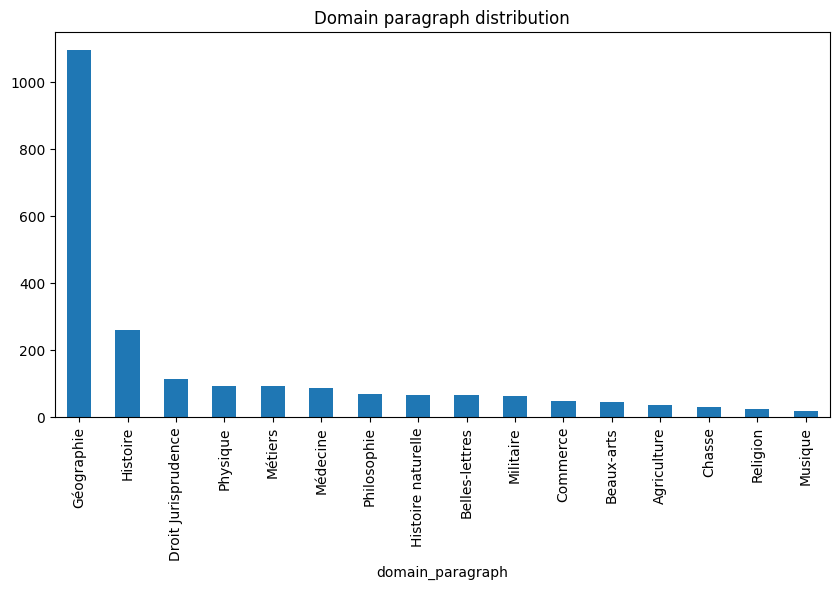

In [8]:
df['domain_paragraph'].value_counts().plot(kind='bar', figsize=(10, 5), title='Domain paragraph distribution')

### Distribution of paragraph across volumes

In [9]:
df['volume'].value_counts().sort_index()

volume
1     287
2     161
3     114
4      96
5      94
6      45
7     113
8     122
9     144
10    120
11    119
12     96
13     94
14    240
15    120
16    123
17    112
Name: count, dtype: int64

<Axes: title={'center': 'Distribution of parapgraphs across volumes'}, xlabel='volume'>

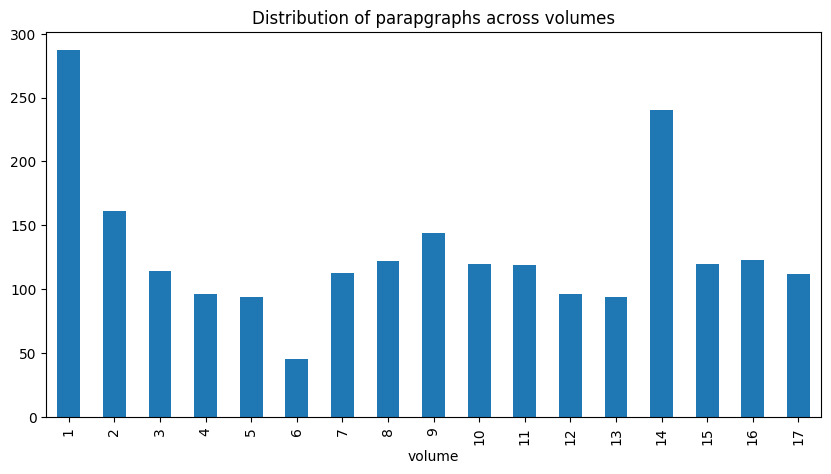

In [10]:
df['volume'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), title='Distribution of parapgraphs across volumes')

### Distribution of paragraphs across authors

In [11]:
df['author'].value_counts()

author
Jaucourt                       879
unsigned                       626
Diderot                        303
Boucher d'Argis                104
d'Alembert                      44
                              ... 
Mallet5                          1
Le Blond5                        1
d'Alembert & de La Chapelle      1
Toussaint5                       1
Alut, fils                       1
Name: count, Length: 86, dtype: int64

<Axes: title={'center': 'Distribution of parapgraphs across authors'}, xlabel='author'>

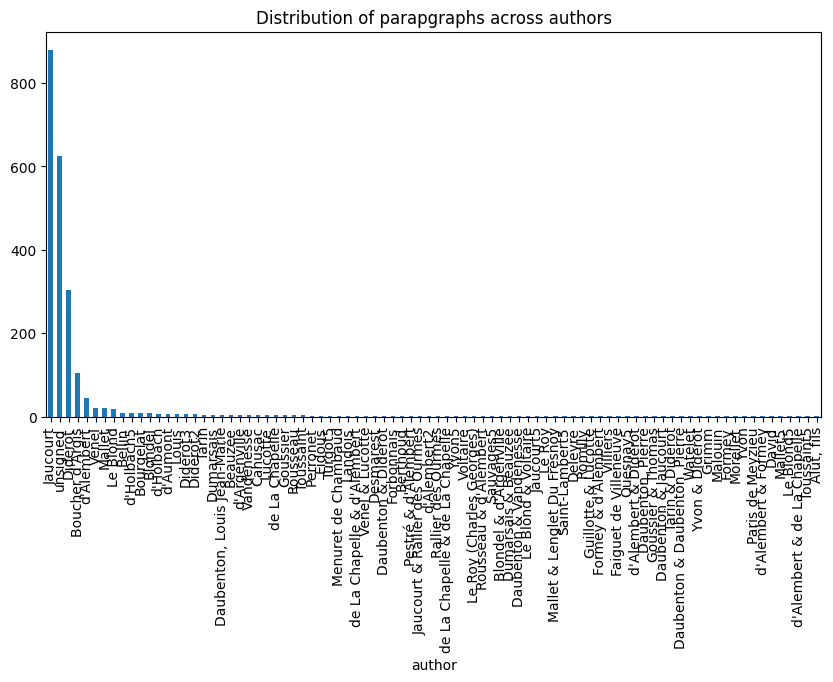

In [12]:
df['author'].value_counts().plot(kind='bar', figsize=(10, 5), title='Distribution of parapgraphs across authors')

### Number of tokens per dataset

In [13]:
def get_nb_tokens(path):
    d = 0
    with jsonlines.open(path) as reader:
        for obj in reader:
            d += len(obj['tokens'])
    return d

In [14]:
print('Number of tokens per dataset:')
for dataset_path in datasets_paths:
    print(dataset_path,'\t', get_nb_tokens(dataset_path))


Number of tokens per dataset:
datasets/jsonl/dataset_train.jsonl 	 135857
datasets/jsonl/dataset_dev.jsonl 	 15360
datasets/jsonl/dataset_val.jsonl 	 14271


### Number of spans per dataset

In [15]:
def get_number_spans(data):
    d = {}
    for obj in data:
        for span in obj['spans']:
                k = span['label']
                if k not in d:
                    d[k] = 1
                else:
                    d[k] += 1
    return d

def get_number_spans_from_jsonl(path):
    with jsonlines.open(path) as reader:
        return get_number_spans(reader)

In [16]:
print('Number of spans per dataset:')
for dataset_path in datasets_paths:
    print(dataset_path,'\t', get_number_spans_from_jsonl(dataset_path))

Number of spans per dataset:
datasets/jsonl/dataset_train.jsonl 	 {'Head': 1264, 'Domain-mark': 1069, 'NC-Spatial': 3268, 'ENE-Spatial': 3044, 'NP-Spatial': 4719, 'Relation': 2101, 'NC-Person': 1378, 'ENE-Person': 491, 'NP-Person': 1603, 'NP-Misc': 953, 'Latlong': 553, 'ENE-Misc': 255}
datasets/jsonl/dataset_dev.jsonl 	 {'Head': 143, 'Domain-mark': 122, 'NC-Spatial': 358, 'ENE-Spatial': 326, 'NP-Spatial': 464, 'Relation': 220, 'Latlong': 66, 'NP-Person': 170, 'NC-Person': 132, 'ENE-Person': 49, 'NP-Misc': 108, 'ENE-Misc': 31}
datasets/jsonl/dataset_val.jsonl 	 {'Head': 154, 'Domain-mark': 133, 'NC-Spatial': 357, 'ENE-Spatial': 334, 'NP-Spatial': 522, 'Relation': 226, 'Latlong': 72, 'NC-Person': 133, 'NP-Person': 150, 'NP-Misc': 96, 'ENE-Person': 57, 'ENE-Misc': 22}


### Spans distribution across labels

#### Concat the datasets into a compliant jsonl format

In [17]:
df_dict = df.to_dict(orient='records')

In [18]:
def plot_pie_chart_spans(spans, ordered_list=None):
    if ordered_list is not None:
        sorted_data = {tag: spans[tag] for tag in ordered_list}
    else:
        sorted_data = spans
    plt.rcParams['font.size'] = 12
    plt.figure(figsize=(8, 8))
    plt.pie(list(sorted_data.values()), colors = sns.color_palette("Paired"), labels=list(sorted_data.keys()), autopct='%1.1f%%', startangle=90)

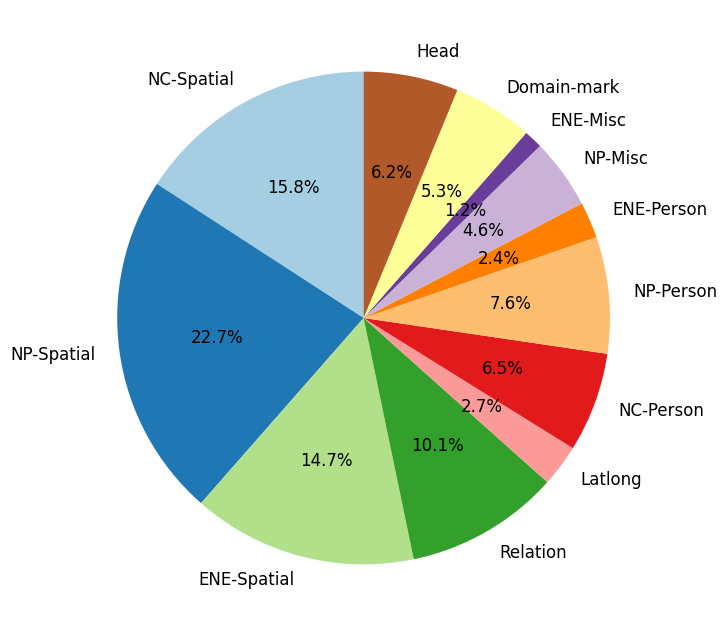

In [19]:
spans = get_number_spans(df_dict)
ordered_list = ['NC-Spatial', 'NP-Spatial', 'ENE-Spatial', 'Relation','Latlong', 'NC-Person', 'NP-Person','ENE-Person', 'NP-Misc', 'ENE-Misc', 'Domain-mark', 'Head']
plot_pie_chart_spans(spans, ordered_list)

### Spans distribution across labels (paragraphs classified under Géographie)

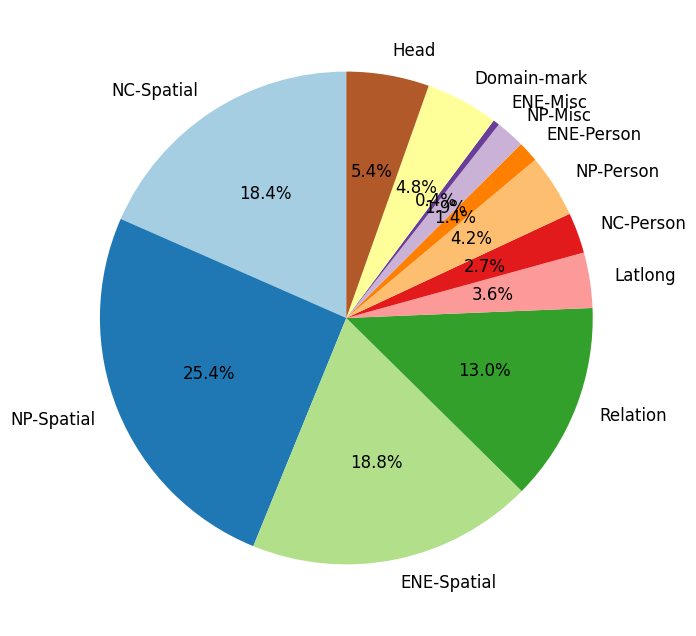

In [20]:
spans = get_number_spans(df[df['domain_paragraph'] == 'Géographie'].to_dict(orient='records'))

ordered_list = ['NC-Spatial', 'NP-Spatial', 'ENE-Spatial', 'Relation','Latlong', 'NC-Person', 'NP-Person','ENE-Person', 'NP-Misc', 'ENE-Misc', 'Domain-mark', 'Head']
plot_pie_chart_spans(spans, ordered_list)

### Spans distribution across labels (paragraphs not classified under Géographie)

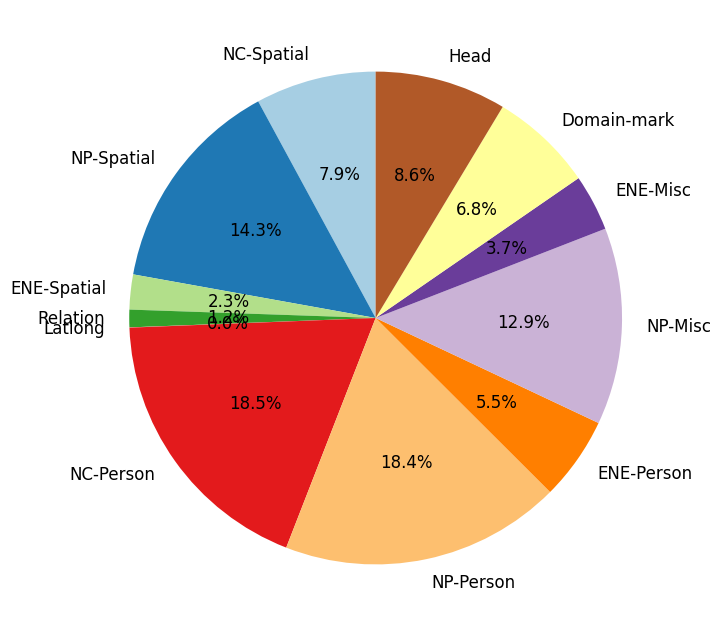

In [21]:
spans = get_number_spans(df[df['domain_paragraph'] != 'Géographie'].to_dict(orient='records'))

ordered_list = ['NC-Spatial', 'NP-Spatial', 'ENE-Spatial', 'Relation','Latlong', 'NC-Person', 'NP-Person','ENE-Person', 'NP-Misc', 'ENE-Misc', 'Domain-mark', 'Head']
plot_pie_chart_spans(spans, ordered_list)